<a href="https://colab.research.google.com/github/KingaTeklak/lista6/blob/main/lista6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Zadanie 1
Wymyśl sposób reprezentowania takich dysków przy pomocy jednego z
wbudowanych typów danych w Pythonie

In [116]:
N = 100

co z dyskami, których środek jest w "polu" ale reszta nie, czy trzeba to precyzować dla dowolnego promienia, czy tylko dla r=0,5, czy wcale?

In [117]:
def generate_disks(n):
  disks = []

  for i in range(n):
    x = round(random.uniform(-15, 15.1), 1)
    y = round(random.uniform(-15, 15.1), 1)
    r = round(random.uniform(0.5, 0.51), 1)

    disks.append([x, y, r])

  return disks


Wygenerowanie dyski:

In [118]:
disks = generate_disks(N)
disks.sort(key=lambda n: n[0])

print(disks)

[[-14.7, 3.4, 0.5], [-14.5, 14.8, 0.5], [-14.4, -1.6, 0.5], [-14.0, 6.2, 0.5], [-13.1, -8.0, 0.5], [-12.7, 14.8, 0.5], [-12.6, -3.5, 0.5], [-12.3, -4.9, 0.5], [-12.3, 8.6, 0.5], [-12.0, -14.2, 0.5], [-12.0, -5.5, 0.5], [-11.7, 5.8, 0.5], [-11.6, -4.1, 0.5], [-11.4, 14.3, 0.5], [-11.4, 14.2, 0.5], [-9.8, -12.6, 0.5], [-9.3, 14.1, 0.5], [-9.2, -4.7, 0.5], [-9.1, -8.5, 0.5], [-8.9, 1.9, 0.5], [-8.5, 12.8, 0.5], [-7.2, 7.6, 0.5], [-7.1, -5.8, 0.5], [-6.9, 11.0, 0.5], [-6.9, -8.6, 0.5], [-6.8, 15.0, 0.5], [-6.5, -14.7, 0.5], [-6.4, -10.8, 0.5], [-6.2, -0.9, 0.5], [-5.9, 7.9, 0.5], [-5.5, -7.9, 0.5], [-4.8, -4.2, 0.5], [-4.7, -7.6, 0.5], [-4.4, -12.3, 0.5], [-4.0, 8.1, 0.5], [-3.9, 13.4, 0.5], [-3.8, -3.3, 0.5], [-3.2, -13.5, 0.5], [-3.2, 5.0, 0.5], [-2.5, -6.8, 0.5], [-2.0, -7.3, 0.5], [-1.7, -1.5, 0.5], [-1.3, -11.5, 0.5], [-0.9, 1.7, 0.5], [-0.2, 10.0, 0.5], [0.1, 11.4, 0.5], [0.5, 3.0, 0.5], [0.5, 11.2, 0.5], [0.9, 7.3, 0.5], [1.4, -8.7, 0.5], [1.5, 3.1, 0.5], [2.5, -2.8, 0.5], [2.6, -5.

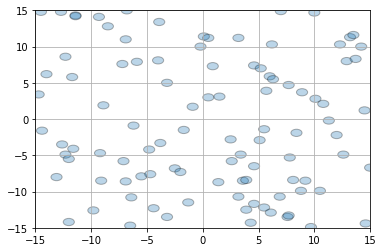

[[-14.7, 3.4, 0.5], [-14.5, 14.8, 0.5], [-14.4, -1.6, 0.5], [-14.0, 6.2, 0.5], [-13.1, -8.0, 0.5], [-12.7, 14.8, 0.5], [-12.6, -3.5, 0.5], [-12.3, -4.9, 0.5], [-12.3, 8.6, 0.5], [-12.0, -14.2, 0.5], [-12.0, -5.5, 0.5], [-11.7, 5.8, 0.5], [-11.6, -4.1, 0.5], [-11.4, 14.3, 0.5], [-11.4, 14.2, 0.5], [-9.8, -12.6, 0.5], [-9.3, 14.1, 0.5], [-9.2, -4.7, 0.5], [-9.1, -8.5, 0.5], [-8.9, 1.9, 0.5], [-8.5, 12.8, 0.5], [-7.2, 7.6, 0.5], [-7.1, -5.8, 0.5], [-6.9, 11.0, 0.5], [-6.9, -8.6, 0.5], [-6.8, 15.0, 0.5], [-6.5, -14.7, 0.5], [-6.4, -10.8, 0.5], [-6.2, -0.9, 0.5], [-5.9, 7.9, 0.5], [-5.5, -7.9, 0.5], [-4.8, -4.2, 0.5], [-4.7, -7.6, 0.5], [-4.4, -12.3, 0.5], [-4.0, 8.1, 0.5], [-3.9, 13.4, 0.5], [-3.8, -3.3, 0.5], [-3.2, -13.5, 0.5], [-3.2, 5.0, 0.5], [-2.5, -6.8, 0.5], [-2.0, -7.3, 0.5], [-1.7, -1.5, 0.5], [-1.3, -11.5, 0.5], [-0.9, 1.7, 0.5], [-0.2, 10.0, 0.5], [0.1, 11.4, 0.5], [0.5, 3.0, 0.5], [0.5, 11.2, 0.5], [0.9, 7.3, 0.5], [1.4, -8.7, 0.5], [1.5, 3.1, 0.5], [2.5, -2.8, 0.5], [2.6, -5.

In [119]:
def draw_disks(disks):
  fig = plt.figure()
  ax = fig.add_subplot(111) 
  for disk in disks:
    crcle = matplotlib.patches.Circle((disk[0], disk[1]), disk[2], alpha = 0.3, edgecolor="black")
    ax.add_patch(crcle)

  plt.xlim(-15, 15)
  plt.ylim(-15, 15)
  plt.grid()
  plt.show()
  print(disks)

draw_disks(disks)

# Zadanie 2
Napisz funkcję, która będzie wykrywać kolizję między dwoma dyskami.
Funkcja ta powinna zwracać wartość True, jeżeli dyski „zachodzą” na
siebie

In [120]:
def colision(first_disk, second_disk):
  r_sum = first_disk[2] + second_disk[2]
  distance = math.sqrt((first_disk[0] - second_disk[0]) ** 2 + (first_disk[1] - second_disk[1]) ** 2)

  return distance < r_sum

colision(disks[28], disks[30])


False

# Zadanie 3
 Napisz funkcję, która przesunie dysk na płaszczyźnie o wektor podany
jako drugi argument.

In [121]:
def move(disk, vector):
  
  x, y = vector
  disk[0] += x
  disk[1] += y

  return disk




Szukam odpowiedniego wektora

In [13]:
def vektor_y(disk_y):
  
  if disk_y <= 14.5:
    disk_y += 0.5
  else:
    disk_y = -15
  return disk_y

vektor_y(disks[0][1])


-8.8

In [15]:
def vector_x(disk_x):
  if disk_x <=14.5:
    disk_x += 0.5
  else:
    disk_x = -15
  return disk_x
vector_x(disks[0][0])


-12.9

# Zadanie 5
 Napisz program, który na płaszczyźnie −15 ¬ x, y ¬ 15:
• rozmieści 100 dysków o promieniu r = 0.5 w losowych położeniach,
• wykryje kolizje.
• rozsunie dyski tak, żeby co najwyżej stykały się ze sobą.
Program powinien zakończyć działanie po usunięciu ostatniej z kolizji.

In [ ]:
def seperate_disks(disks):
  #print(disks)
  n = 0
  for first_disk in disks:
    n+=1
    for second_disk in disks[n:]:
      if first_disk != second_disk:
        if abs(first_disk[0] - second_disk[0]) >= first_disk[2]+second_disk[2]:
          break
        
        else:
          while colision(first_disk, second_disk):
            
            first_disk = move(first_disk, (0,vektor_y(first_disk[1])))
            
            break
  return disks
            
          

  

seperate_disks(disks)

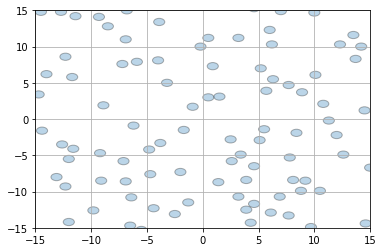

[[-14.7, 3.4, 0.5], [-14.5, 14.8, 0.5], [-14.4, -1.6, 0.5], [-14.0, 6.2, 0.5], [-13.1, -8.0, 0.5], [-12.7, 14.8, 0.5], [-12.6, -3.5, 0.5], [-12.3, -9.3, 0.5], [-12.3, 8.6, 0.5], [-12.0, -14.2, 0.5], [-12.0, -5.5, 0.5], [-11.7, 5.8, 0.5], [-11.6, -4.1, 0.5], [-11.4, 29.1, 0.5], [-11.4, 14.2, 0.5], [-9.8, -12.6, 0.5], [-9.3, 14.1, 0.5], [-9.2, -4.7, 0.5], [-9.1, -8.5, 0.5], [-8.9, 1.9, 0.5], [-8.5, 12.8, 0.5], [-7.2, 7.6, 0.5], [-7.1, -5.8, 0.5], [-6.9, 11.0, 0.5], [-6.9, -8.6, 0.5], [-6.8, 15.0, 0.5], [-6.5, -14.7, 0.5], [-6.4, -10.8, 0.5], [-6.2, -0.9, 0.5], [-5.9, 7.9, 0.5], [-5.5, -15.3, 0.5], [-4.8, -4.2, 0.5], [-4.7, -7.6, 0.5], [-4.4, -12.3, 0.5], [-4.0, 8.1, 0.5], [-3.9, 13.4, 0.5], [-3.8, -3.3, 0.5], [-3.2, -26.5, 0.5], [-3.2, 5.0, 0.5], [-2.5, -13.1, 0.5], [-2.0, -7.3, 0.5], [-1.7, -1.5, 0.5], [-1.3, -11.5, 0.5], [-0.9, 1.7, 0.5], [-0.2, 10.0, 0.5], [0.1, 23.3, 0.5], [0.5, 3.0, 0.5], [0.5, 11.2, 0.5], [0.9, 7.3, 0.5], [1.4, -8.7, 0.5], [1.5, 3.1, 0.5], [2.5, -2.8, 0.5], [2.6, -

In [123]:
def draw_new_disks(disks):
  fig = plt.figure()
  ax = fig.add_subplot(111) 
  for disk in disks:
    crcle = matplotlib.patches.Circle((disk[0], disk[1]), disk[2], alpha = 0.3, edgecolor="black")
    ax.add_patch(crcle)

  plt.xlim(-15, 15)
  plt.ylim(-15, 15)
  plt.grid()
  plt.show()
  

draw_disks(seperate_disks(disks))

wartosc wektora, porównywanie ograniczonej lb dysków, wybieranie które dyski porównujemy, animacja